In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
import Preprocessing
import DataProcessing
import model
import numpy as np
import utils
import time
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
# load data 
data = Preprocessing.load_data('data/rt_iot2022', target_col='Attack_type')

c:\Users\QUIN\anaconda3\envs\PPNKCH\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
Preprocessing.check_types(data,"object")

proto
service
Attack_type


In [3]:
attack_labels = data['Attack_type'].unique()

In [4]:
data = Preprocessing.delete_columns(data, ["Unnamed: 0",'service'])
data = data.loc[:, data.columns.notna()]
data = Preprocessing.one_hot_encode(data, ['proto'])
data,_ = Preprocessing.label_encode(data, ['Attack_type'])
print(data.head(5))

   id.orig_p  id.resp_p  flow_duration  fwd_pkts_tot  bwd_pkts_tot  \
0      38667       1883      32.011598             9             5   
1      51143       1883      31.883584             9             5   
2      44761       1883      32.124053             9             5   
3      60893       1883      31.961063             9             5   
4      51087       1883      31.902362             9             5   

   fwd_data_pkts_tot  bwd_data_pkts_tot  fwd_pkts_per_sec  bwd_pkts_per_sec  \
0                  3                  3          0.281148          0.156193   
1                  3                  3          0.282277          0.156821   
2                  3                  3          0.280164          0.155647   
3                  3                  3          0.281593          0.156440   
4                  3                  3          0.282111          0.156728   

   flow_pkts_per_sec  ...      idle.max      idle.tot      idle.avg  idle.std  \
0           0.437341  .

In [5]:
# Tìm các cột không phải là số (numeric)
non_numeric_cols = data.select_dtypes(exclude=["number"]).columns.tolist()
print("Các cột không phải kiểu số:")
print(non_numeric_cols)


Các cột không phải kiểu số:
['proto_tcp', 'proto_udp']


In [6]:
#Tách cột target ra khỏi dữ liệu
X, y = data.drop('Attack_type', axis=1), data['Attack_type']
X,_ = Preprocessing.scale_data(X)
# X_balanced, y_balanced = Preprocessing.apply_smote(X, y)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [7]:
#chưa áp dụng smotesmote
X_train_nsm, X_test_nsm, y_train_nsm, y_test_nsm = train_test_split(X,y, test_size=0.2, random_state=42)

#áp dụng smote
X_train_sm, X_test_sm, y_train_sm, y_test_sm = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_sm, y_train_sm = Preprocessing.apply_smote(X_train_sm, y_train_sm)

Train với dữ liệu chưa giảm chiều

LinearSVC

c:\Users\QUIN\anaconda3\envs\PPNKCH\lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Thời gian chạy: 1010.0293 giây
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.89      0.91      1578
           1       0.77      0.99      0.87       100
           2       1.00      1.00      1.00     18897
           3       1.00      1.00      1.00       871
           4       0.18      0.67      0.29         6
           5       0.40      0.67      0.50         3
           6       0.99      1.00      0.99       393
           7       1.00      1.00      1.00       220
           8       0.97      0.85      0.91       489
           9       0.99      0.99      0.99       384
          10       0.92      0.95      0.94      1625
          11       0.59      0.84      0.70        58

    accuracy                           0.99     24624
   macro avg       0.81      0.90      0.84     24624
weighted avg       0.99      0.99      0.99     24624

Confusion Matrix:
 [[ 1406     4     0     1    11     1     3     0     2    

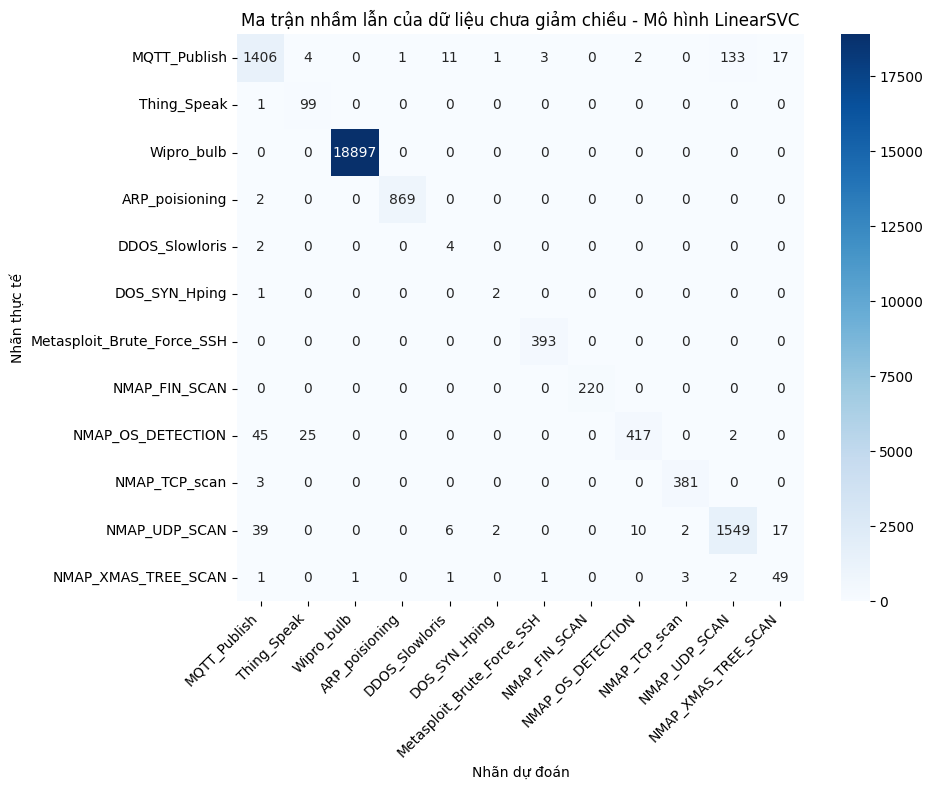

In [8]:
model_LinearSVC = model.model_LinearSVC(X_train_sm, y_train_sm)
y_pred = model_LinearSVC.predict(X_test_sm)
utils.report(y_test_sm, y_pred)
utils.plot_confusion_matrix(y_test_sm, y_pred, attack_labels, "Ma trận nhầm lẫn của dữ liệu chưa giảm chiều - Mô hình LinearSVC" )

In [9]:
accuracy = accuracy_score(y_test_sm, y_pred)
print("Accuracy:", accuracy)

report = classification_report(y_test_sm, y_pred, output_dict=True)
print("Precision (macro):", report["macro avg"]["precision"])
print("Recall (macro):", report["macro avg"]["recall"])
print("F1-score (macro):", report["macro avg"]["f1-score"])
print("Support (macro):", report["macro avg"]["support"])

Accuracy: 0.9862735542560104
Precision (macro): 0.8124574786165756
Recall (macro): 0.9045870817619172
F1-score (macro): 0.8408095210656404
Support (macro): 24624.0


xgboost

In [10]:
# import numpy as np

# label_mapping = {
#     'Attack_type': {
#         np.int64(0): 'ARP_poisioning',
#         np.int64(1): 'DDOS_Slowloris',
#         np.int64(2): 'DOS_SYN_Hping',
#         np.int64(3): 'MQTT_Publish',
#         np.int64(4): 'Metasploit_Brute_Force_SSH',
#         np.int64(5): 'NMAP_FIN_SCAN',
#         np.int64(6): 'NMAP_OS_DETECTION',
#         np.int64(7): 'NMAP_TCP_scan',
#         np.int64(8): 'NMAP_UDP_SCAN',
#         np.int64(9): 'NMAP_XMAS_TREE_SCAN',
#         np.int64(10): 'Thing_Speak',
#         np.int64(11): 'Wipro_bulb'
#     }
# }

# for key, value in label_mapping['Attack_type'].items():
#     print(f"{key} -> {value}")


In [11]:
attack_labels = [
    'ARP_poisioning',
    'DDOS_Slowloris',
    'DOS_SYN_Hping',
    'MQTT_Publish',
    'Metasploit_Brute_Force_SSH',
    'NMAP_FIN_SCAN',
    'NMAP_OS_DETECTION',
    'NMAP_TCP_scan',
    'NMAP_UDP_SCAN',
    'NMAP_XMAS_TREE_SCAN',
    'Thing_Speak',
    'Wipro_bulb'
]

In [12]:
print(y_test_sm.value_counts())

Attack_type
2     18897
10     1625
0      1578
3       871
8       489
6       393
9       384
7       220
1       100
11       58
4         6
5         3
Name: count, dtype: int64


c:\Users\QUIN\anaconda3\envs\PPNKCH\lib\site-packages\xgboost\training.py:183: UserWarning: [08:10:42] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Thời gian chạy: 4.2372 giây
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1578
           1       1.00      1.00      1.00       100
           2       1.00      1.00      1.00     18897
           3       1.00      1.00      1.00       871
           4       0.83      0.83      0.83         6
           5       0.67      0.67      0.67         3
           6       1.00      1.00      1.00       393
           7       1.00      1.00      1.00       220
           8       1.00      0.99      0.99       489
           9       1.00      0.99      1.00       384
          10       0.99      0.99      0.99      1625
          11       1.00      0.97      0.98        58

    accuracy                           1.00     24624
   macro avg       0.96      0.95      0.95     24624
weighted avg       1.00      1.00      1.00     24624

Confusion Matrix:
 [[ 1569     0     0     0     0     0     0     0     0     0 

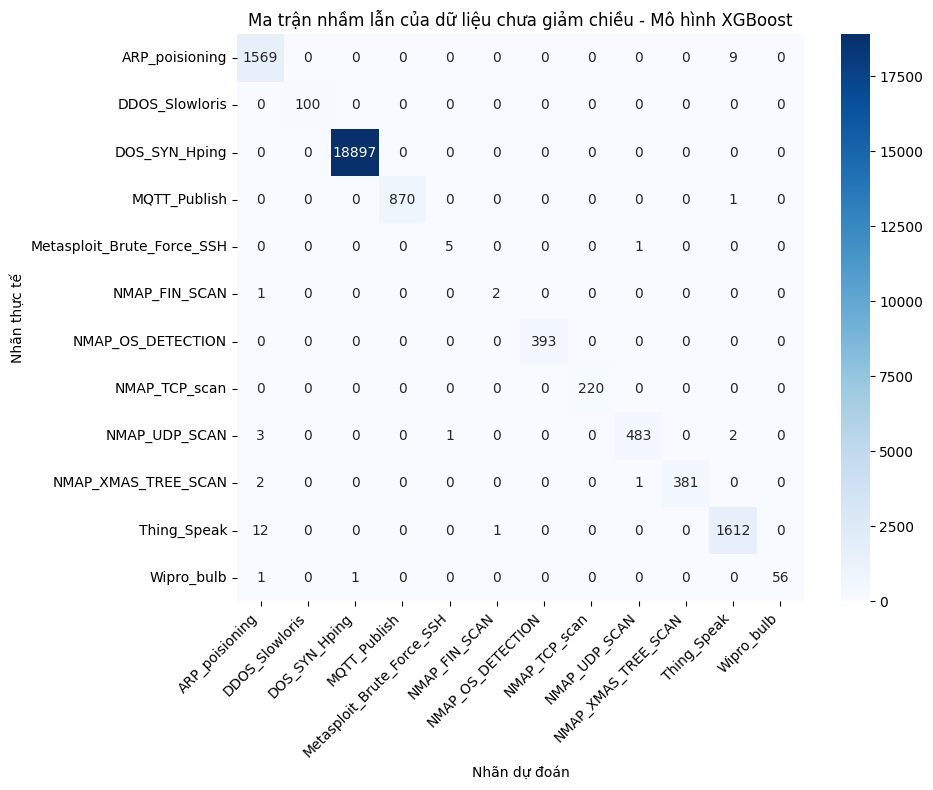

In [13]:
model_xgboost = model.model_xgboost(X_train_sm, y_train_sm,12)
y_pred = model_xgboost.predict(X_test_sm)
utils.report(y_test_sm, y_pred)
 
utils.plot_confusion_matrix(y_test_sm, y_pred, attack_labels, "Ma trận nhầm lẫn của dữ liệu chưa giảm chiều - Mô hình XGBoost" )

In [14]:
accuracy = accuracy_score(y_test_sm, y_pred)
print("Accuracy:", accuracy)

report = classification_report(y_test_sm, y_pred, output_dict=True)
print("Precision (macro):", report["macro avg"]["precision"])
print("Recall (macro):", report["macro avg"]["recall"])
print("F1-score (macro):", report["macro avg"]["f1-score"])
print("Support (macro):", report["macro avg"]["support"])

Accuracy: 0.9985380116959064
Precision (macro): 0.9563724562441163
Recall (macro): 0.9525486062541711
F1-score (macro): 0.9544317946551096
Support (macro): 24624.0


logistic_regression

c:\Users\QUIN\anaconda3\envs\PPNKCH\lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Thời gian chạy: 23.8363 giây
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.86      0.90      1578
           1       0.73      0.99      0.84       100
           2       1.00      1.00      1.00     18897
           3       0.99      1.00      1.00       871
           4       0.09      0.83      0.16         6
           5       0.40      0.67      0.50         3
           6       1.00      1.00      1.00       393
           7       1.00      1.00      1.00       220
           8       0.84      0.87      0.85       489
           9       1.00      0.99      1.00       384
          10       0.94      0.94      0.94      1625
          11       0.60      0.91      0.73        58

    accuracy                           0.98     24624
   macro avg       0.79      0.92      0.83     24624
weighted avg       0.99      0.98      0.98     24624

Confusion Matrix:
 [[ 1354    11     0     5    14     1     0     0    74     0

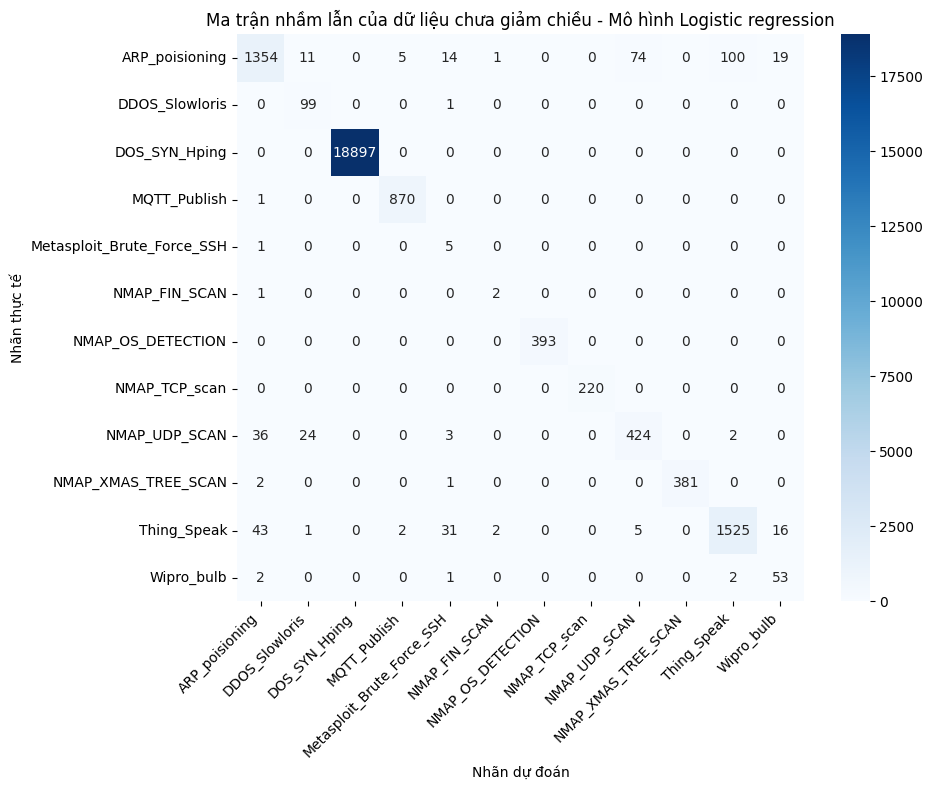

In [15]:
model_logistic_regression = model.model_logistic_regression(X_train_sm, y_train_sm)
y_pred = model_logistic_regression.predict(X_test_sm)
utils.report(y_test_sm, y_pred)
utils.plot_confusion_matrix(y_test_sm, y_pred, attack_labels, "Ma trận nhầm lẫn của dữ liệu chưa giảm chiều - Mô hình Logistic regression" )

In [16]:
accuracy = accuracy_score(y_test_sm,y_pred)
print("Accuracy:", accuracy)

report = classification_report(y_test_sm,y_pred, output_dict=True)
print("Precision (macro):", report["macro avg"]["precision"])
print("Recall (macro):", report["macro avg"]["recall"])
print("F1-score (macro):", report["macro avg"]["f1-score"])
print("Support (macro):", report["macro avg"]["support"])

Accuracy: 0.9837150747238467
Precision (macro): 0.7946906078528712
Recall (macro): 0.9215348219280372
F1-score (macro): 0.825900190908169
Support (macro): 24624.0


KNN

Thời gian chạy: 0.0410 giây
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98      1578
           1       0.98      0.97      0.97       100
           2       1.00      1.00      1.00     18897
           3       1.00      1.00      1.00       871
           4       0.45      0.83      0.59         6
           5       0.40      0.67      0.50         3
           6       1.00      1.00      1.00       393
           7       1.00      1.00      1.00       220
           8       0.99      0.98      0.99       489
           9       1.00      0.99      1.00       384
          10       0.98      0.98      0.98      1625
          11       0.98      0.91      0.95        58

    accuracy                           1.00     24624
   macro avg       0.90      0.94      0.91     24624
weighted avg       1.00      1.00      1.00     24624

Confusion Matrix:
 [[ 1547     1     0     0     3     1     0     0     0     0 

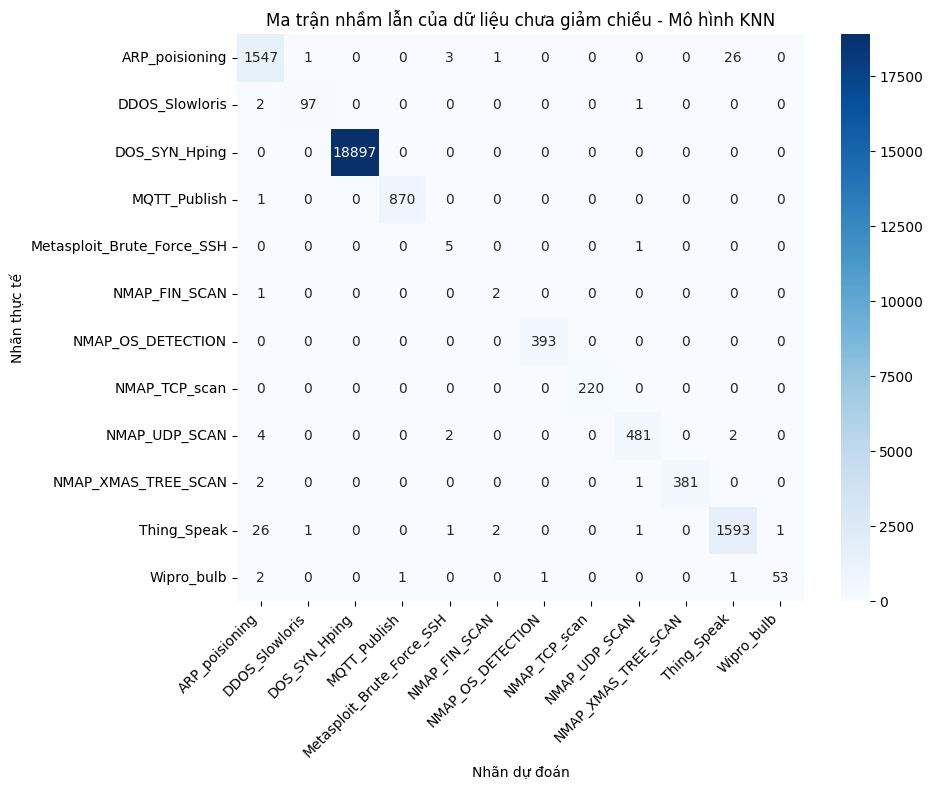

In [17]:
model_knn = model.model_knn(X_train_sm, y_train_sm)
y_pred = model_knn.predict(X_test_sm)
utils.report(y_test_sm, y_pred)
utils.plot_confusion_matrix(y_test_sm, y_pred, attack_labels, "Ma trận nhầm lẫn của dữ liệu chưa giảm chiều - Mô hình KNN" )

In [18]:
accuracy = accuracy_score(y_test_sm, y_pred)
print("Accuracy:", accuracy)

report = classification_report(y_test_sm, y_pred, output_dict=True)
print("Precision (macro):", report["macro avg"]["precision"])
print("Recall (macro):", report["macro avg"]["recall"])
print("F1-score (macro):", report["macro avg"]["f1-score"])
print("Support (macro):", report["macro avg"]["support"])

Accuracy: 0.9965480831708902
Precision (macro): 0.896836449293073
Recall (macro): 0.943261262627022
F1-score (macro): 0.9125230234592236
Support (macro): 24624.0


random_forest

Thời gian chạy: 5.7257 giây
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99      1578
           1       0.98      0.96      0.97       100
           2       1.00      1.00      1.00     18897
           3       1.00      1.00      1.00       871
           4       0.83      0.83      0.83         6
           5       1.00      0.67      0.80         3
           6       1.00      1.00      1.00       393
           7       1.00      1.00      1.00       220
           8       0.99      0.99      0.99       489
           9       1.00      0.99      1.00       384
          10       0.99      0.99      0.99      1625
          11       1.00      0.95      0.97        58

    accuracy                           1.00     24624
   macro avg       0.98      0.95      0.96     24624
weighted avg       1.00      1.00      1.00     24624

Confusion Matrix:
 [[ 1566     0     0     0     0     0     0     0     1     0 

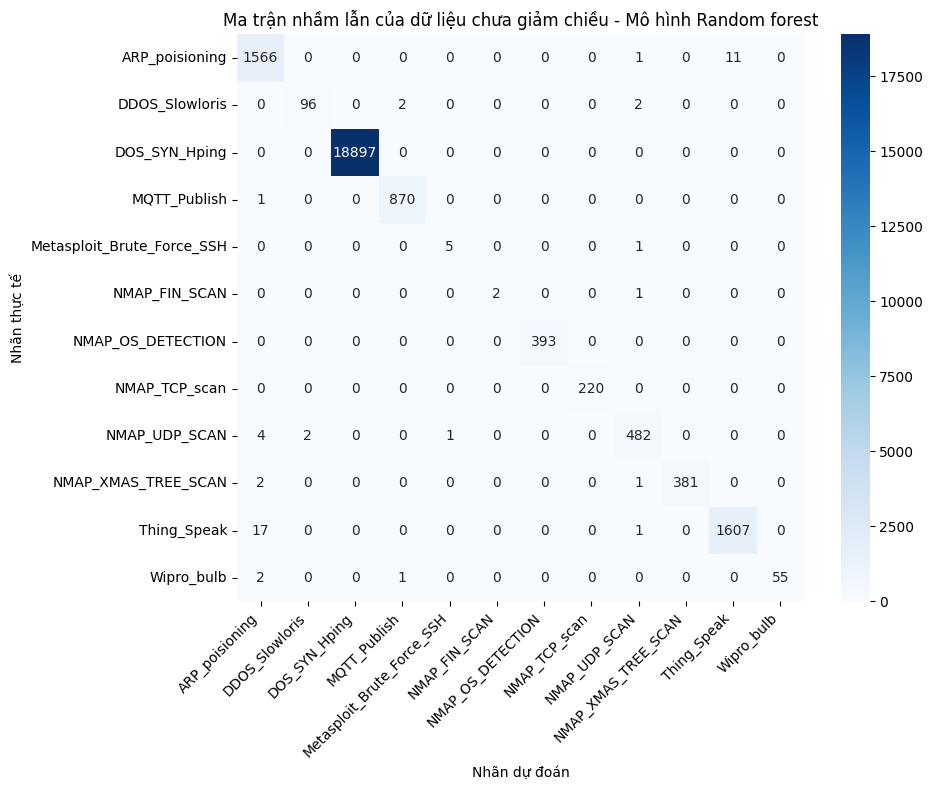

In [19]:
model_random_forest = model.model_random_forest(X_train_sm, y_train_sm)
y_pred = model_random_forest.predict(X_test_sm)
utils.report(y_test_sm, y_pred)
utils.plot_confusion_matrix(y_test_sm, y_pred, attack_labels, "Ma trận nhầm lẫn của dữ liệu chưa giảm chiều - Mô hình Random forest" )

In [20]:
accuracy = accuracy_score(y_test_sm,y_pred)
print("Accuracy:", accuracy)

report = classification_report(y_test_sm,y_pred, output_dict=True)
print("Precision (macro):", report["macro avg"]["precision"])
print("Recall (macro):", report["macro avg"]["recall"])
print("F1-score (macro):", report["macro avg"]["f1-score"])
print("Support (macro):", report["macro avg"]["support"])

Accuracy: 0.9979694606887589
Precision (macro): 0.9810036367122588
Recall (macro): 0.9471932368502771
F1-score (macro): 0.9612518196986694
Support (macro): 24624.0


MLP

Đang huấn luyện trên: cuda
Epoch [1/10000], Loss: 2.5039
Epoch [10/10000], Loss: 2.3366
Epoch [20/10000], Loss: 2.0438
Epoch [30/10000], Loss: 1.6037
Epoch [40/10000], Loss: 1.2302
Epoch [50/10000], Loss: 0.9838
Epoch [60/10000], Loss: 0.8148
Epoch [70/10000], Loss: 0.6866
Epoch [80/10000], Loss: 0.5881
Epoch [90/10000], Loss: 0.5042
Epoch [100/10000], Loss: 0.4297
Epoch [110/10000], Loss: 0.3857
Epoch [120/10000], Loss: 0.3515
Epoch [130/10000], Loss: 0.3298
Epoch [140/10000], Loss: 0.3130
Epoch [150/10000], Loss: 0.2877
Epoch [160/10000], Loss: 0.2758
Epoch [170/10000], Loss: 0.2615
Epoch [180/10000], Loss: 0.2584
Epoch [190/10000], Loss: 0.2520
Epoch [200/10000], Loss: 0.2380
Epoch [210/10000], Loss: 0.2373
Epoch [220/10000], Loss: 0.2229
Epoch [230/10000], Loss: 0.2214
Epoch [240/10000], Loss: 0.2133
Epoch [250/10000], Loss: 0.2061
Epoch [260/10000], Loss: 0.2080
Epoch [270/10000], Loss: 0.2009
Epoch [280/10000], Loss: 0.1966
Epoch [290/10000], Loss: 0.1898
Epoch [300/10000], Loss:

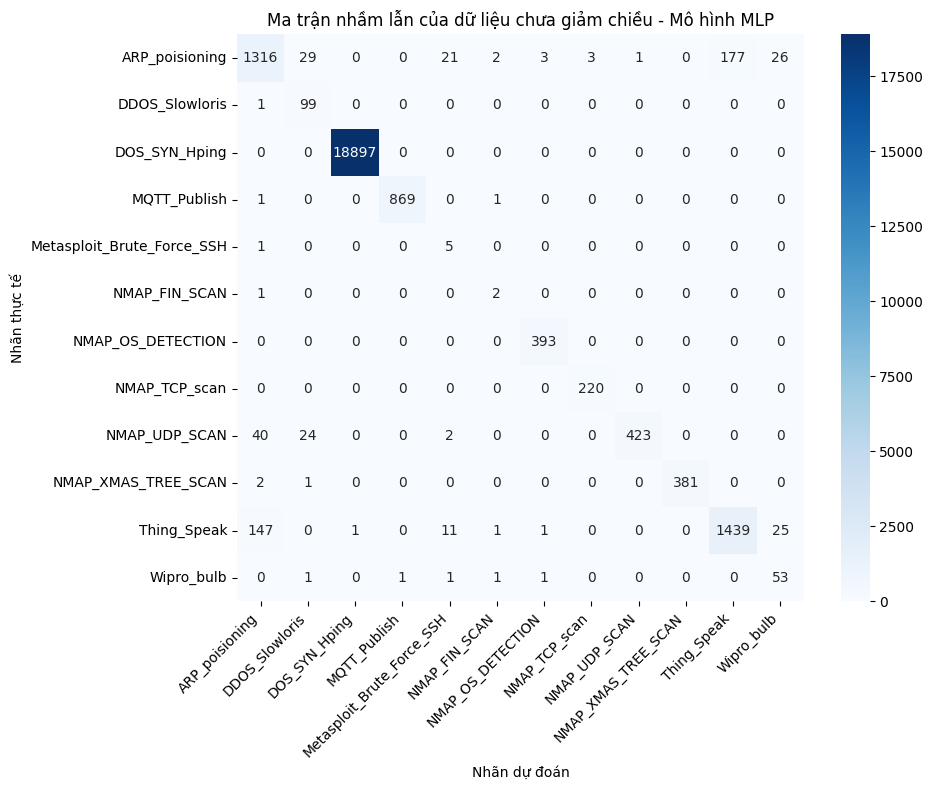

In [21]:
model_mlp = model.model_mlp(X_train_sm, y_train_sm, input_size=X_train_sm.shape[1],
                  hidden_size1=128, hidden_size2=64, hidden_size3=32, output_size=12, epochs=10000)
y_pred = model.predict_mlp(model_mlp, X_test_sm)
utils.report(y_test_sm,y_pred)
utils.plot_confusion_matrix(y_test_sm,y_pred, attack_labels, "Ma trận nhầm lẫn của dữ liệu chưa giảm chiều - Mô hình MLP" )

In [22]:
accuracy = accuracy_score(y_test_sm,y_pred)
print("Accuracy:", accuracy)

report = classification_report(y_test_sm,y_pred, output_dict=True)
print("Precision (macro):", report["macro avg"]["precision"])
print("Recall (macro):", report["macro avg"]["recall"])
print("F1-score (macro):", report["macro avg"]["f1-score"])
print("Support (macro):", report["macro avg"]["support"])

Accuracy: 0.9785981156595192
Precision (macro): 0.7746817732334742
Recall (macro): 0.9148517146230609
F1-score (macro): 0.8083080291033565
Support (macro): 24624.0


Train với dữ liệu đã giảm chiều

c:\Users\QUIN\Desktop\PPNCKH\DataProcessing.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_features, x='Importance', y='Feature', palette='viridis')


40


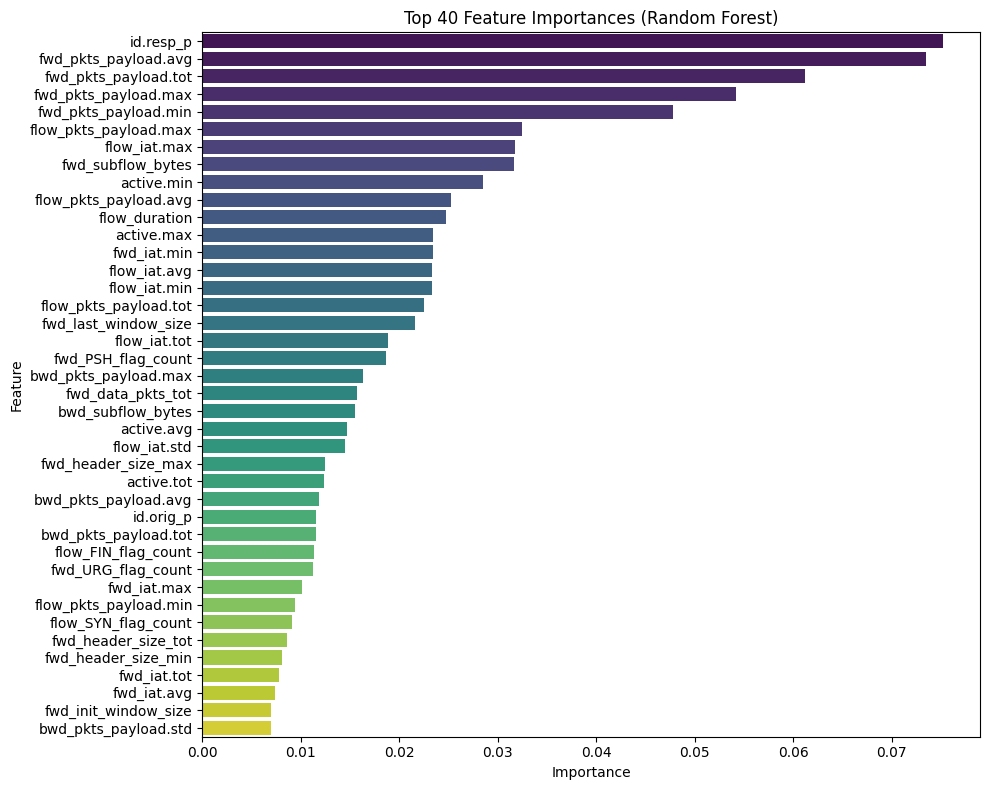

In [23]:
# Xử lý dữ liệu
list = DataProcessing.select_feature(X_train_sm, y_train_sm)
print(len(list))

In [24]:
X_train_sm = X_train_sm[list['Feature']]
df_reduced, dropped_columns = DataProcessing.remove_highly_correlated_columns(X_train_sm[list['Feature']], threshold=0.8)

Các cột bị loại bỏ: ['bwd_pkts_payload.tot', 'fwd_data_pkts_tot', 'flow_iat.tot', 'bwd_pkts_payload.avg', 'fwd_iat.max', 'active.avg', 'flow_iat.avg', 'fwd_iat.tot', 'fwd_pkts_payload.min', 'flow_iat.std', 'flow_SYN_flag_count', 'active.max', 'fwd_init_window_size', 'bwd_pkts_payload.std', 'bwd_pkts_payload.max', 'fwd_iat.avg', 'bwd_subflow_bytes', 'flow_pkts_payload.max', 'fwd_header_size_min']


In [25]:
X_train_sm_dr = df_reduced
X_test_sm_dr = X_test_sm[list['Feature']].drop(dropped_columns, axis=1)
y_train_sm_dr = y_train_sm.copy()
y_test_sm_dr = y_test_sm.copy()

LinearSVC

Thời gian chạy: 31.3156 giây
Classification Report:
               precision    recall  f1-score   support

           0       0.59      0.82      0.69      1578
           1       0.56      0.78      0.65       100
           2       1.00      1.00      1.00     18897
           3       1.00      1.00      1.00       871
           4       0.08      0.67      0.14         6
           5       0.33      0.67      0.44         3
           6       0.98      1.00      0.99       393
           7       0.92      1.00      0.96       220
           8       0.82      0.87      0.84       489
           9       0.99      0.99      0.99       384
          10       0.90      0.46      0.61      1625
          11       0.44      0.64      0.52        58

    accuracy                           0.95     24624
   macro avg       0.72      0.82      0.74     24624
weighted avg       0.96      0.95      0.95     24624

Confusion Matrix:
 [[ 1297    34     0     1    38     1     7    18    79     2

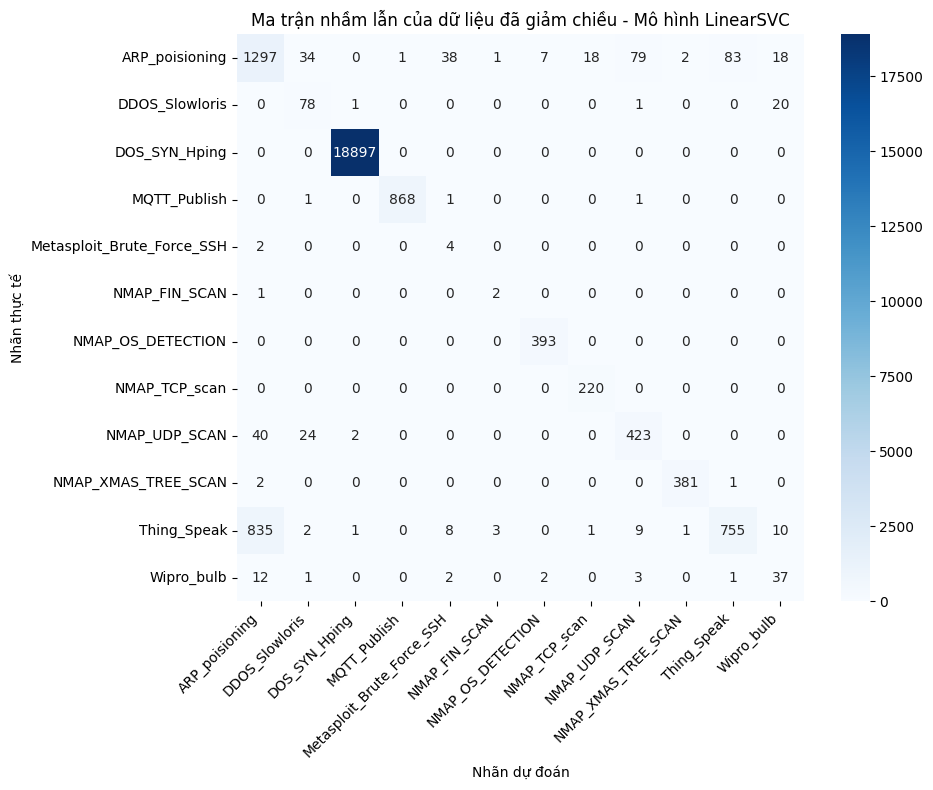

In [26]:
model_LinearSVC_dr = model.model_LinearSVC(X_train_sm_dr, y_train_sm_dr)
y_pred_dr = model_LinearSVC_dr.predict(X_test_sm_dr)
utils.report(y_test_sm_dr,y_pred_dr)
utils.plot_confusion_matrix(y_test_sm_dr,y_pred_dr, attack_labels, "Ma trận nhầm lẫn của dữ liệu đã giảm chiều - Mô hình LinearSVC" )

In [27]:
accuracy = accuracy_score(y_test_sm_dr, y_pred_dr)
print("Accuracy:", accuracy)

report = classification_report(y_test_sm_dr, y_pred_dr, output_dict=True)
print("Precision (macro):", report["macro avg"]["precision"])
print("Recall (macro):", report["macro avg"]["recall"])
print("F1-score (macro):", report["macro avg"]["f1-score"])
print("Support (macro):", report["macro avg"]["support"])

Accuracy: 0.9484649122807017
Precision (macro): 0.71677217681439
Recall (macro): 0.8242983416356515
F1-score (macro): 0.7356305543943057
Support (macro): 24624.0


xgboost

c:\Users\QUIN\anaconda3\envs\PPNKCH\lib\site-packages\xgboost\training.py:183: UserWarning: [08:13:51] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Thời gian chạy: 1.8486 giây
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1578
           1       0.99      1.00      1.00       100
           2       1.00      1.00      1.00     18897
           3       1.00      1.00      1.00       871
           4       0.83      0.83      0.83         6
           5       1.00      0.67      0.80         3
           6       1.00      1.00      1.00       393
           7       1.00      1.00      1.00       220
           8       0.99      0.99      0.99       489
           9       1.00      0.99      1.00       384
          10       0.99      0.99      0.99      1625
          11       0.98      0.98      0.98        58

    accuracy                           1.00     24624
   macro avg       0.98      0.95      0.96     24624
weighted avg       1.00      1.00      1.00     24624

Confusion Matrix:
 [[ 1566     0     0     0     0     0     0     0     1     0 

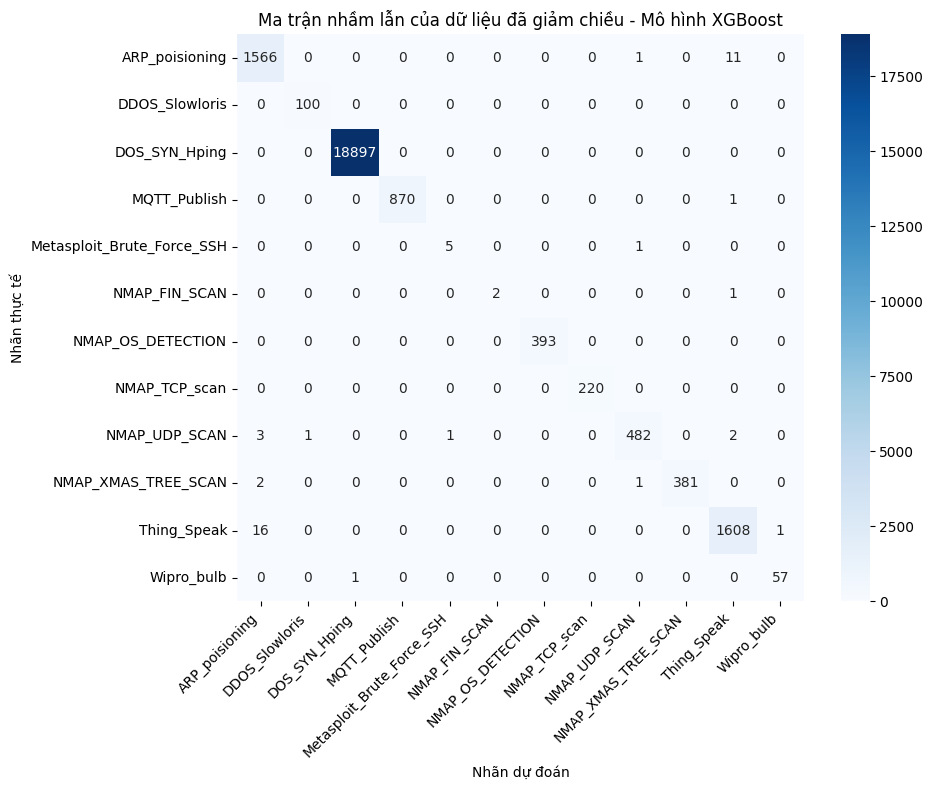

In [28]:
model_xgboost_dr = model.model_xgboost(X_train_sm_dr, y_train_sm_dr,12)
y_pred_dr = model_xgboost_dr.predict(X_test_sm_dr)
utils.report(y_test_sm_dr,y_pred_dr)
utils.plot_confusion_matrix(y_test_sm_dr,y_pred_dr, attack_labels, "Ma trận nhầm lẫn của dữ liệu đã giảm chiều - Mô hình XGBoost" )

In [29]:
accuracy = accuracy_score(y_test_sm_dr,y_pred_dr)
print("Accuracy:", accuracy)

report = classification_report(y_test_sm_dr,y_pred_dr, output_dict=True)
print("Precision (macro):", report["macro avg"]["precision"])
print("Recall (macro):", report["macro avg"]["recall"])
print("F1-score (macro):", report["macro avg"]["f1-score"])
print("Support (macro):", report["macro avg"]["support"])

Accuracy: 0.9982537361923327
Precision (macro): 0.9814564852421731
Recall (macro): 0.9534514154532832
F1-score (macro): 0.9646707268722935
Support (macro): 24624.0


logistic_regression

c:\Users\QUIN\anaconda3\envs\PPNKCH\lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Thời gian chạy: 11.2608 giây
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.80      0.81      1578
           1       0.65      0.97      0.78       100
           2       1.00      1.00      1.00     18897
           3       1.00      1.00      1.00       871
           4       0.08      0.83      0.15         6
           5       0.20      0.67      0.31         3
           6       0.97      1.00      0.99       393
           7       0.92      1.00      0.96       220
           8       0.80      0.87      0.83       489
           9       1.00      0.99      1.00       384
          10       0.95      0.82      0.88      1625
          11       0.39      0.74      0.51        58

    accuracy                           0.97     24624
   macro avg       0.73      0.89      0.77     24624
weighted avg       0.98      0.97      0.97     24624

Confusion Matrix:
 [[ 1270    22     3     2    44     4     9    19   105     0

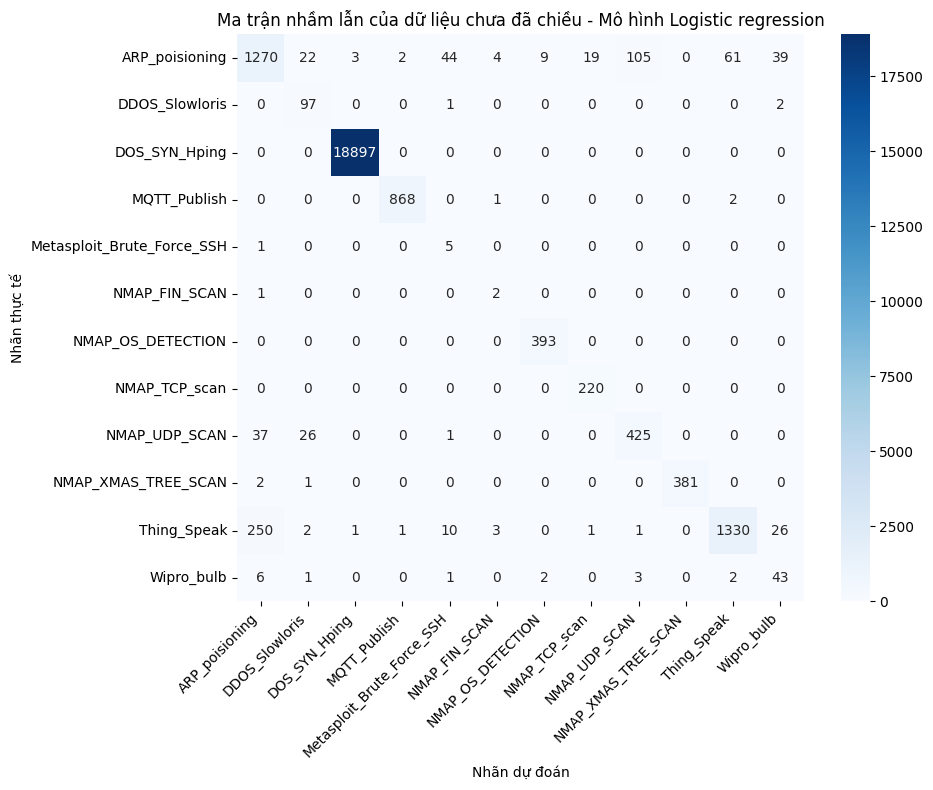

In [30]:
model_logistic_regression_dr = model.model_logistic_regression(X_train_sm_dr, y_train_sm_dr)
y_pred_dr = model_logistic_regression_dr.predict(X_test_sm_dr)
utils.report(y_test_sm_dr,y_pred_dr)
utils.plot_confusion_matrix(y_test_sm_dr,y_pred_dr, attack_labels, "Ma trận nhầm lẫn của dữ liệu chưa đã chiều - Mô hình Logistic regression" )

In [31]:
accuracy = accuracy_score(y_test_sm_dr,y_pred_dr)
print("Accuracy:", accuracy)

report = classification_report(y_test_sm_dr,y_pred_dr, output_dict=True)
print("Precision (macro):", report["macro avg"]["precision"])
print("Recall (macro):", report["macro avg"]["recall"])
print("F1-score (macro):", report["macro avg"]["f1-score"])
print("Support (macro):", report["macro avg"]["support"])

Accuracy: 0.9718567251461988
Precision (macro): 0.7306745823061337
Recall (macro): 0.8910434091160928
F1-score (macro): 0.7666946694541293
Support (macro): 24624.0


knn

Thời gian chạy: 0.0140 giây
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.98      1578
           1       0.98      0.98      0.98       100
           2       1.00      1.00      1.00     18897
           3       1.00      1.00      1.00       871
           4       0.36      0.83      0.50         6
           5       0.50      0.67      0.57         3
           6       1.00      1.00      1.00       393
           7       0.98      1.00      0.99       220
           8       0.99      0.98      0.99       489
           9       1.00      0.99      1.00       384
          10       0.99      0.98      0.98      1625
          11       0.93      0.86      0.89        58

    accuracy                           1.00     24624
   macro avg       0.89      0.94      0.91     24624
weighted avg       1.00      1.00      1.00     24624

Confusion Matrix:
 [[ 1552     1     0     0     6     0     0     2     0     0 

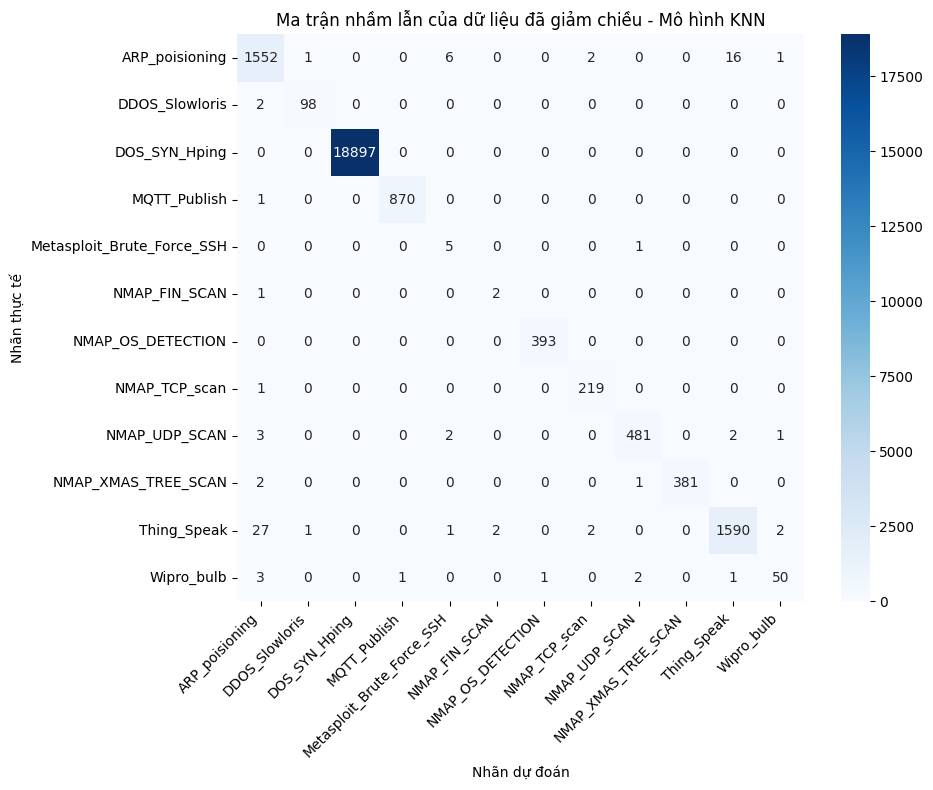

In [32]:
model_knn_dr = model.model_knn(X_train_sm_dr, y_train_sm_dr)
y_pred_dr = model_knn_dr.predict(X_test_sm_dr)
utils.report(y_test_sm_dr, y_pred_dr)
utils.plot_confusion_matrix(y_test_sm_dr, y_pred_dr, attack_labels, "Ma trận nhầm lẫn của dữ liệu đã giảm chiều - Mô hình KNN" )

In [33]:
accuracy = accuracy_score(y_test_sm_dr, y_pred_dr)
print("Accuracy:", accuracy)

report = classification_report(y_test_sm_dr, y_pred_dr, output_dict=True)
print("Precision (macro):", report["macro avg"]["precision"])
print("Recall (macro):", report["macro avg"]["recall"])
print("F1-score (macro):", report["macro avg"]["f1-score"])
print("Support (macro):", report["macro avg"]["support"])

Accuracy: 0.9965074723846654
Precision (macro): 0.8913553132557723
Recall (macro): 0.9395156644174144
F1-score (macro): 0.9064017170286477
Support (macro): 24624.0


random_forest

Thời gian chạy: 3.7024 giây
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99      1578
           1       1.00      0.98      0.99       100
           2       1.00      1.00      1.00     18897
           3       1.00      1.00      1.00       871
           4       0.83      0.83      0.83         6
           5       1.00      0.67      0.80         3
           6       1.00      1.00      1.00       393
           7       1.00      1.00      1.00       220
           8       0.99      0.99      0.99       489
           9       1.00      0.99      1.00       384
          10       1.00      0.99      0.99      1625
          11       0.96      0.95      0.96        58

    accuracy                           1.00     24624
   macro avg       0.98      0.95      0.96     24624
weighted avg       1.00      1.00      1.00     24624

Confusion Matrix:
 [[ 1570     0     0     0     0     0     0     0     0     0 

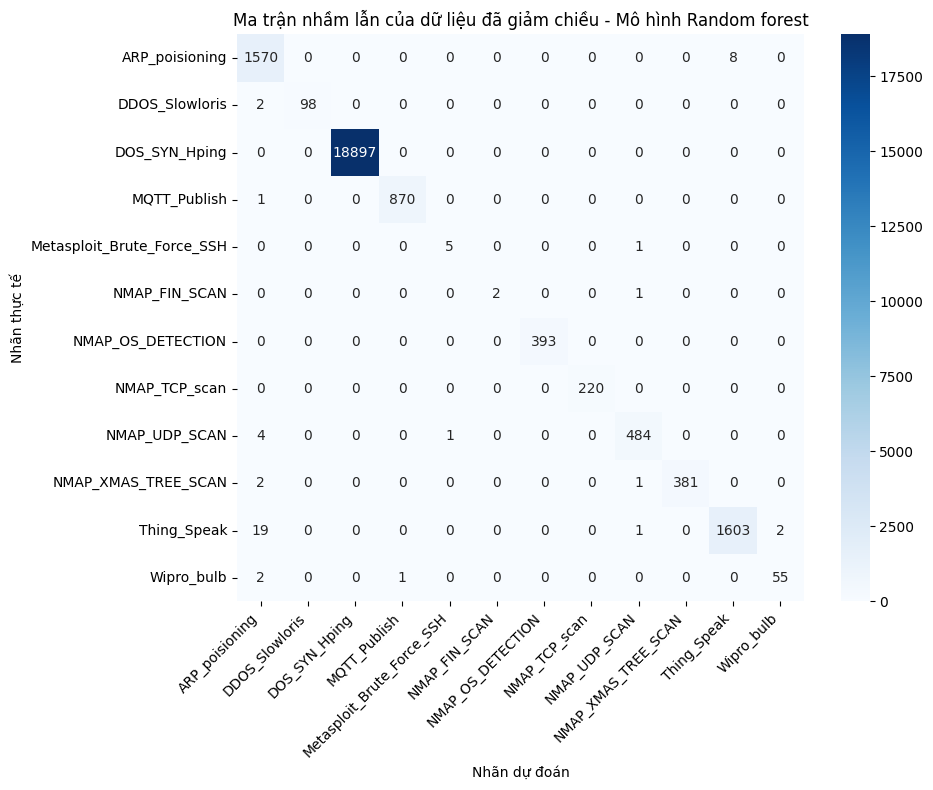

In [34]:
model_random_forest_dr = model.model_random_forest(X_train_sm_dr, y_train_sm_dr)
y_pred_dr = model_random_forest_dr.predict(X_test_sm_dr)
utils.report(y_test_sm_dr, y_pred_dr)
utils.plot_confusion_matrix(y_test_sm_dr, y_pred_dr, attack_labels, "Ma trận nhầm lẫn của dữ liệu đã giảm chiều - Mô hình Random forest" )

In [35]:
accuracy = accuracy_score(y_test_sm_dr, y_pred_dr)
print("Accuracy:", accuracy)

report = classification_report(y_test_sm_dr, y_pred_dr, output_dict=True)
print("Precision (macro):", report["macro avg"]["precision"])
print("Recall (macro):", report["macro avg"]["recall"])
print("F1-score (macro):", report["macro avg"]["f1-score"])
print("Support (macro):", report["macro avg"]["support"])

Accuracy: 0.9981319038336582
Precision (macro): 0.9804320772819527
Recall (macro): 0.9492068447948142
F1-score (macro): 0.9620203837221148
Support (macro): 24624.0


MLP

In [36]:
model_mlp_dr = model.model_mlp(X_train_sm_dr, y_train_sm_dr, input_size=X_train_sm_dr.shape[1],
                  hidden_size1=128, hidden_size2=64, hidden_size3=32, output_size=12, epochs=10000)

Đang huấn luyện trên: cuda
Epoch [1/10000], Loss: 2.4824
Epoch [10/10000], Loss: 2.3439
Epoch [20/10000], Loss: 2.1337
Epoch [30/10000], Loss: 1.8808
Epoch [40/10000], Loss: 1.5988
Epoch [50/10000], Loss: 1.3489
Epoch [60/10000], Loss: 1.1480
Epoch [70/10000], Loss: 1.0041
Epoch [80/10000], Loss: 0.8895
Epoch [90/10000], Loss: 0.7862
Epoch [100/10000], Loss: 0.7032
Epoch [110/10000], Loss: 0.6280
Epoch [120/10000], Loss: 0.5815
Epoch [130/10000], Loss: 0.5363
Epoch [140/10000], Loss: 0.5067
Epoch [150/10000], Loss: 0.4764
Epoch [160/10000], Loss: 0.4478
Epoch [170/10000], Loss: 0.4328
Epoch [180/10000], Loss: 0.4153
Epoch [190/10000], Loss: 0.4005
Epoch [200/10000], Loss: 0.3839
Epoch [210/10000], Loss: 0.3731
Epoch [220/10000], Loss: 0.3701
Epoch [230/10000], Loss: 0.3549
Epoch [240/10000], Loss: 0.3411
Epoch [250/10000], Loss: 0.3373
Epoch [260/10000], Loss: 0.3334
Epoch [270/10000], Loss: 0.3156
Epoch [280/10000], Loss: 0.3138
Epoch [290/10000], Loss: 0.3085
Epoch [300/10000], Loss:

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.83      0.87      1578
           1       0.63      0.99      0.77       100
           2       1.00      1.00      1.00     18897
           3       1.00      1.00      1.00       871
           4       0.09      0.83      0.16         6
           5       0.15      0.67      0.25         3
           6       0.99      1.00      0.99       393
           7       0.91      1.00      0.95       220
           8       0.96      0.86      0.91       489
           9       1.00      0.99      1.00       384
          10       0.92      0.92      0.92      1625
          11       0.54      0.88      0.67        58

    accuracy                           0.98     24624
   macro avg       0.76      0.91      0.79     24624
weighted avg       0.98      0.98      0.98     24624

Confusion Matrix:
 [[ 1309    32     0     2    37     9     0    18    16     0   126    29]
 [    1    99  

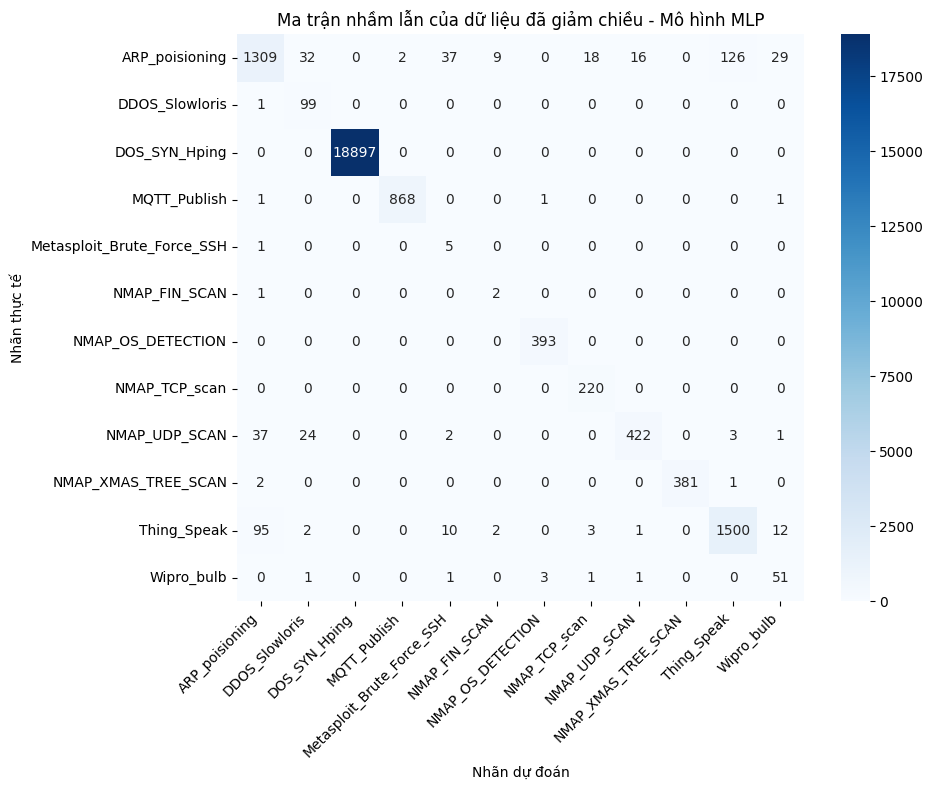

In [37]:
y_pred_dr = model.predict_mlp(model_mlp_dr, X_test_sm_dr)
utils.report(y_test_sm, y_pred_dr)
utils.plot_confusion_matrix(y_test_sm, y_pred_dr, attack_labels, "Ma trận nhầm lẫn của dữ liệu đã giảm chiều - Mô hình MLP" )

In [38]:
accuracy = accuracy_score(y_test_sm, y_pred_dr)
print("Accuracy:", accuracy)

report = classification_report(y_test_sm, y_pred_dr, output_dict=True)
print("Precision (macro):", report["macro avg"]["precision"])
print("Recall (macro):", report["macro avg"]["recall"])
print("F1-score (macro):", report["macro avg"]["f1-score"])
print("Support (macro):", report["macro avg"]["support"])

Accuracy: 0.9806286549707602
Precision (macro): 0.757881148656521
Recall (macro): 0.9144705990052869
F1-score (macro): 0.7907141997762971
Support (macro): 24624.0


Train mô hỉnh tinh chỉnh.

In [39]:

# y_pred = model_random_forest.predict(X_test_sm)
# utils.report(y_pred,y_test_sm)

In [40]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint

Random Forest

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Thời gian huấn luyện: 250.52 giây
Best params: {'bootstrap': False, 'max_depth': 14, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 108}
Random Forest Classification Report:
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99      1578
           1       0.98      1.00      0.99       100
           2       1.00      1.00      1.00     18897
           3       1.00      1.00      1.00       871
           4       0.83      0.83      0.83         6
           5       0.67      0.67      0.67         3
           6       1.00      1.00      1.00       393
           7       1.00      1.00      1.00       220
           8       0.99      0.99      0.99       489
           9       1.00      0.99      1.00       384
          10       0.99      0.99      0.99      1625
          11       0.98      0.95      0.96        

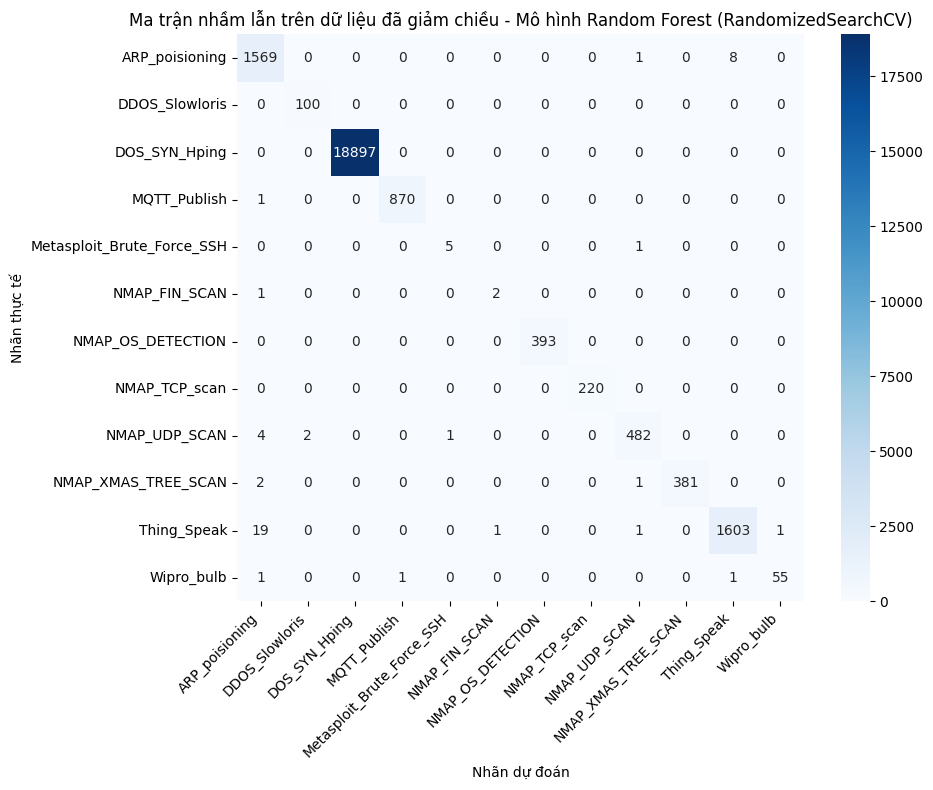

In [41]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
import time

# Không gian tham số mở rộng
param_dist = {
    'n_estimators': randint(50, 200),
    'max_depth': randint(3, 20),
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 10),
    'max_features': ['sqrt', 'log2', None],
    'bootstrap': [True, False]
}

# Khởi tạo mô hình Random Forest
get_random_forest_model_instance = model.get_random_forest_model() 

# Tìm kiếm tham số ngẫu nhiên
random_search = RandomizedSearchCV(
    estimator=get_random_forest_model_instance,
    param_distributions=param_dist,
    n_iter=50,
    cv=5,
    scoring='f1_macro',
    random_state=42,
    n_jobs=-1,
    verbose=1
)

# Huấn luyện và đo thời gian
start_time = time.time()
random_search.fit(X_train_sm_dr, y_train_sm_dr)
end_time = time.time()
print(f'Thời gian huấn luyện: {end_time - start_time:.2f} giây')

# Kết quả
print("Best params:", random_search.best_params_)

# Dự đoán và đánh giá
y_pred_rd = random_search.predict(X_test_sm_dr)
print("Random Forest Classification Report:")
utils.report(y_test_sm_dr, y_pred_rd)

utils.plot_confusion_matrix(
    y_test_sm_dr,
    y_pred_rd,
    attack_labels,
    "Ma trận nhầm lẫn trên dữ liệu đã giảm chiều - Mô hình Random Forest (RandomizedSearchCV)"
)


In [42]:
accuracy = accuracy_score(y_test_sm_dr,y_pred_rd)
print("Accuracy:", accuracy)

report = classification_report(y_test_sm_dr,y_pred_rd, output_dict=True)
print("Precision (macro):", report["macro avg"]["precision"])
print("Recall (macro):", report["macro avg"]["recall"])
print("F1-score (macro):", report["macro avg"]["f1-score"])
print("Support (macro):", report["macro avg"]["support"])

Accuracy: 0.9980912930474334
Precision (macro): 0.9525033712512591
Recall (macro): 0.9504798703688498
F1-score (macro): 0.9514524377622938
Support (macro): 24624.0


XGBoost

Class distribution: Counter({2: 75762, 10: 6483, 0: 6172, 3: 3275, 8: 2101, 9: 1626, 6: 1607, 7: 782, 11: 500, 1: 500, 4: 500, 5: 500})
Fitting 5 folds for each of 50 candidates, totalling 250 fits


c:\Users\QUIN\anaconda3\envs\PPNKCH\lib\site-packages\xgboost\training.py:183: UserWarning: [08:25:49] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "scale_pos_weight" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Thời gian huấn luyện: 344.29 giây
Best parameters for XGBoost: {'subsample': 0.8, 'scale_pos_weight': 1.0, 'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.2, 'gamma': 0.1, 'colsample_bytree': 0.6}
XGBoost Classification Report:
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99      1578
           1       1.00      0.99      0.99       100
           2       1.00      1.00      1.00     18897
           3       1.00      1.00      1.00       871
           4       0.67      0.67      0.67         6
           5       1.00      0.67      0.80         3
           6       1.00      1.00      1.00       393
           7       1.00      1.00      1.00       220
           8       1.00      0.98      0.99       489
           9       1.00      0.99      1.00       384
          10       0.99      0.99      0.99      1625
          11       1.00      0.97      0.98        58

    accuracy                        

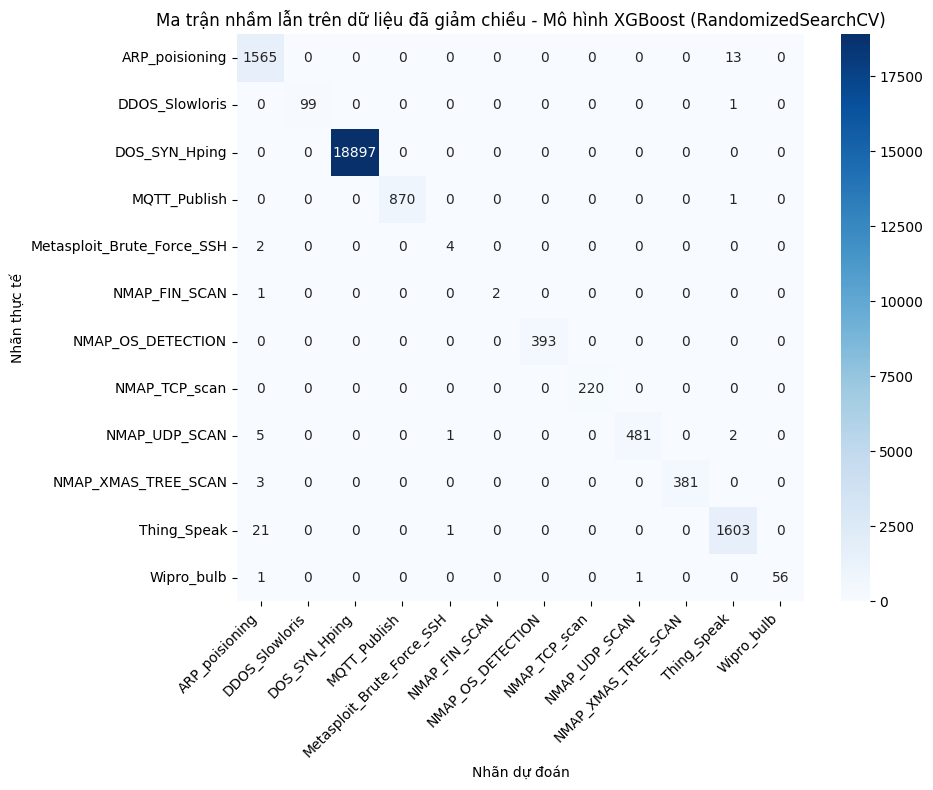

In [43]:
from sklearn.model_selection import GridSearchCV
import time
from collections import Counter
# Kiểm tra phân bố lớp
print("Class distribution:", Counter(y_train_sm_dr))

# Tính scale_pos_weight
class_counts = np.bincount(y_train_sm_dr)
scale_pos_weight = float(class_counts[0]) / class_counts[1]

# Không gian tham số mở rộng
param_dist = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'scale_pos_weight': [1.0, scale_pos_weight],
    'gamma': [0, 0.1, 0.2]  # tuỳ chọn
}

# Khởi tạo mô hình
xgb_model = model.get_xgboost_model(random_state=42)

# Tìm kiếm ngẫu nhiên
random_search_xgb = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_dist,
    n_iter=50,  # tăng nếu có thể
    cv=5,
    scoring='f1_macro',
    random_state=42,
    n_jobs=-1,
    verbose=1
)

# Huấn luyện
start_time = time.time()
random_search_xgb.fit(X_train_sm_dr, y_train_sm_dr)
end_time = time.time()
print(f'Thời gian huấn luyện: {end_time - start_time:.2f} giây')

# Mô hình tốt nhất
best_xgb_model = random_search_xgb.best_estimator_
print("Best parameters for XGBoost:", random_search_xgb.best_params_)

# Đánh giá
y_pred_xgb = best_xgb_model.predict(X_test_sm_dr)
print("XGBoost Classification Report:")
utils.report(y_test_sm_dr, y_pred_xgb)
utils.plot_confusion_matrix(
    y_test_sm_dr,
    y_pred_xgb,
    attack_labels,
    "Ma trận nhầm lẫn trên dữ liệu đã giảm chiều - Mô hình XGBoost (RandomizedSearchCV)"
)


In [44]:
accuracy = accuracy_score(y_test_sm_dr, y_pred_xgb)
print("Accuracy:", accuracy)

report = classification_report(y_test_sm_dr, y_pred_xgb, output_dict=True)
print("Precision (macro):", report["macro avg"]["precision"])
print("Recall (macro):", report["macro avg"]["recall"])
print("F1-score (macro):", report["macro avg"]["f1-score"])
print("Support (macro):", report["macro avg"]["support"])

Accuracy: 0.9978476283300844
Precision (macro): 0.9694539447660496
Recall (macro): 0.9368127760874119
F1-score (macro): 0.9503192348314932
Support (macro): 24624.0


KNN

c:\Users\QUIN\anaconda3\envs\PPNKCH\lib\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 20 is smaller than n_iter=50. Running 20 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Thời gian huấn luyện: 154.19 giây
Best parameters for KNN: {'weights': 'distance', 'n_neighbors': 3, 'metric': 'manhattan'}
KNN Classification Report:
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.98      1578
           1       0.99      1.00      1.00       100
           2       1.00      1.00      1.00     18897
           3       1.00      1.00      1.00       871
           4       0.50      0.83      0.62         6
           5       0.50      0.67      0.57         3
           6       1.00      1.00      1.00       393
           7       0.99      0.99      0.99       220
           8       0.99      0.98      0.99       489
           9       1.00      0.99      1.00       384
          10       0.99      0.98      0.99      1625
          11       0.96      0.88      0.92        58

    accuracy                           1.00     24624
   macro avg       0.91      0.94      0.92     24624
weighted avg 

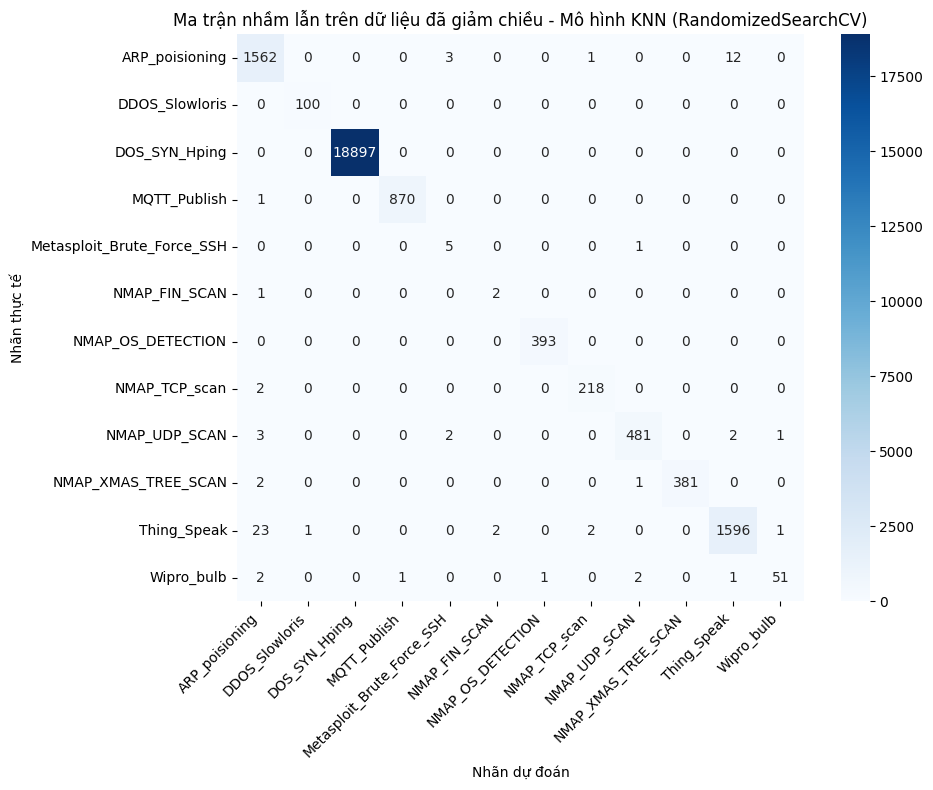

In [45]:
# Định nghĩa không gian tham số cho KNN
param_dist_knn = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# Khởi tạo mô hình
knn_model = model.get_knn_model()

# Tìm kiếm ngẫu nhiên
random_search_knn = RandomizedSearchCV(
    estimator=knn_model,
    param_distributions=param_dist_knn,
    n_iter=50,
    cv=5,
    scoring='f1_macro',
    random_state=42,
    n_jobs=-1
)

# Huấn luyện
start_time = time.time()
random_search_knn.fit(X_train_sm_dr, y_train_sm_dr)
end_time = time.time()
print(f'Thời gian huấn luyện: {end_time - start_time:.2f} giây')
# Lấy mô hình tốt nhất
best_knn_model = random_search_knn.best_estimator_
print("Best parameters for KNN:", random_search_knn.best_params_)

# Dự đoán và đánh giá
y_pred_knn = best_knn_model.predict(X_test_sm_dr)
print("KNN Classification Report:")
utils.report(y_test_sm_dr, y_pred_knn)
utils.plot_confusion_matrix(y_test_sm_dr, y_pred_knn, attack_labels, "Ma trận nhầm lẫn trên dữ liệu đã giảm chiều - Mô hình KNN (RandomizedSearchCV)" )

In [46]:
accuracy = accuracy_score(y_test_sm_dr, y_pred_knn)
print("Accuracy:", accuracy)

report = classification_report(y_test_sm_dr, y_pred_knn, output_dict=True)
print("Precision (macro):", report["macro avg"]["precision"])
print("Recall (macro):", report["macro avg"]["recall"])
print("F1-score (macro):", report["macro avg"]["f1-score"])
print("Support (macro):", report["macro avg"]["support"])


Accuracy: 0.9972384665367121
Precision (macro): 0.9080200546440668
Recall (macro): 0.9430761117567393
F1-score (macro): 0.9209186516849733
Support (macro): 24624.0


GridSearchCV

get_random_forest_model

Fitting 5 folds for each of 864 candidates, totalling 4320 fits
Thời gian huấn luyện: 4597.30 giây
Best params: {'bootstrap': False, 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Random Forest Classification Report:
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99      1578
           1       0.98      1.00      0.99       100
           2       1.00      1.00      1.00     18897
           3       1.00      1.00      1.00       871
           4       0.83      0.83      0.83         6
           5       1.00      0.67      0.80         3
           6       1.00      1.00      1.00       393
           7       1.00      1.00      1.00       220
           8       0.99      0.99      0.99       489
           9       1.00      0.99      1.00       384
          10       0.99      0.99      0.99      1625
          11       0.98      0.95      0.96     

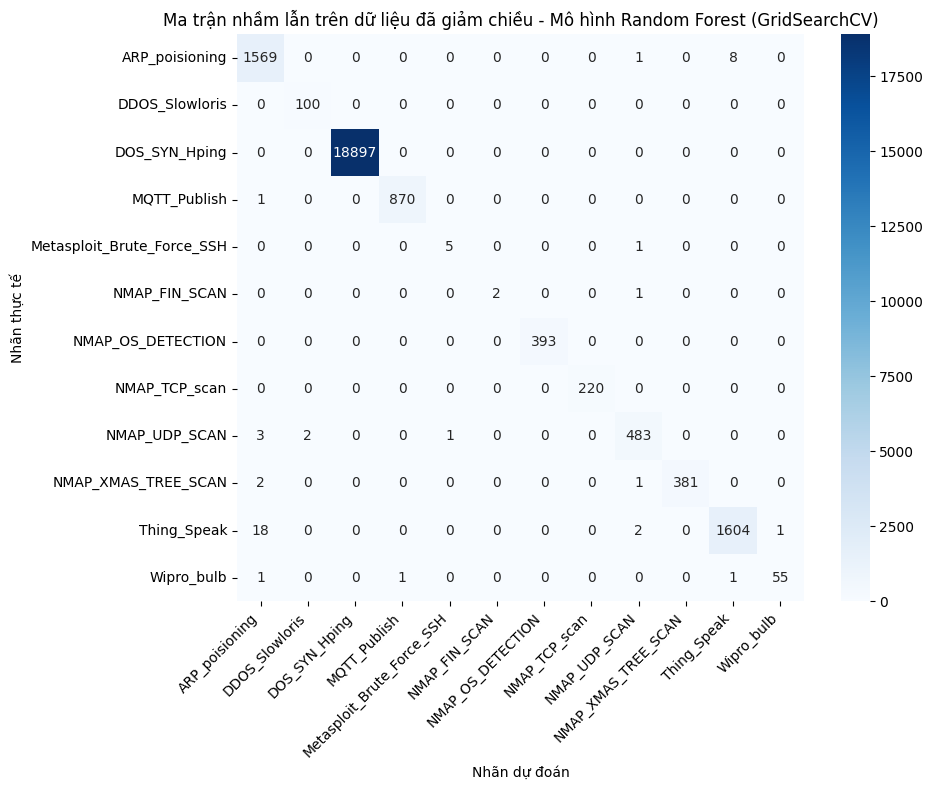

In [48]:
# Không gian tham số cho GridSearchCV (thu hẹp để tối ưu thời gian)
param_grid = {
    'n_estimators': [50, 100, 150, 200],  # Thử 4 giá trị
    'max_depth': [3, 10, 20, None],      # Thử 3 giá trị + None
    'min_samples_split': [2, 5, 10],     # Thử 3 giá trị
    'min_samples_leaf': [1, 5, 10],      # Thử 3 giá trị
    'max_features': ['sqrt', 'log2', None],  # Giữ nguyên
    'bootstrap': [True, False]           # Giữ nguyên
}

# Khởi tạo mô hình Random Forest
get_random_forest_model_instance = model.get_random_forest_model(random_state=42)

# Tìm kiếm tham số với GridSearchCV
grid_search = GridSearchCV(
    estimator=get_random_forest_model_instance,
    param_grid=param_grid,
    cv=5,
    scoring='f1_macro',
    n_jobs=-1,
    verbose=1
)

# Huấn luyện và đo thời gian
start_time = time.time()
grid_search.fit(X_train_sm_dr, y_train_sm_dr)
end_time = time.time()
print(f'Thời gian huấn luyện: {end_time - start_time:.2f} giây')

# Kết quả
print("Best params:", grid_search.best_params_)

# Dự đoán và đánh giá
y_pred_rd = grid_search.predict(X_test_sm_dr)
print("Random Forest Classification Report:")
utils.report(y_test_sm_dr, y_pred_rd)

utils.plot_confusion_matrix(
    y_test_sm_dr,
    y_pred_rd,
    attack_labels,
    "Ma trận nhầm lẫn trên dữ liệu đã giảm chiều - Mô hình Random Forest (GridSearchCV)"
)

In [49]:
accuracy = accuracy_score(y_test_sm_dr,y_pred_rd)
print("Accuracy:", accuracy)

report = classification_report(y_test_sm_dr,y_pred_rd, output_dict=True)
print("Precision (macro):", report["macro avg"]["precision"])
print("Recall (macro):", report["macro avg"]["recall"])
print("F1-score (macro):", report["macro avg"]["f1-score"])
print("Support (macro):", report["macro avg"]["support"])

Accuracy: 0.998172514619883
Precision (macro): 0.9800989019615988
Recall (macro): 0.9507015682347194
F1-score (macro): 0.9625851036036309
Support (macro): 24624.0


get_xgboost_model

Class distribution: Counter({2: 75762, 10: 6483, 0: 6172, 3: 3275, 8: 2101, 9: 1626, 6: 1607, 7: 782, 11: 500, 1: 500, 4: 500, 5: 500})
Fitting 5 folds for each of 1944 candidates, totalling 9720 fits


c:\Users\QUIN\anaconda3\envs\PPNKCH\lib\site-packages\xgboost\training.py:183: UserWarning: [13:17:01] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "scale_pos_weight" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Thời gian huấn luyện: 12596.03 giây
Best parameters for XGBoost: {'colsample_bytree': 0.6, 'gamma': 0, 'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 100, 'scale_pos_weight': 1.0, 'subsample': 0.8}
XGBoost Classification Report:
Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      1578
           1       1.00      1.00      1.00       100
           2       1.00      1.00      1.00     18897
           3       1.00      1.00      1.00       871
           4       0.80      0.67      0.73         6
           5       1.00      0.67      0.80         3
           6       1.00      1.00      1.00       393
           7       1.00      1.00      1.00       220
           8       0.99      0.99      0.99       489
           9       1.00      0.99      1.00       384
          10       0.99      0.99      0.99      1625
          11       1.00      0.97      0.98        58

    accuracy                        

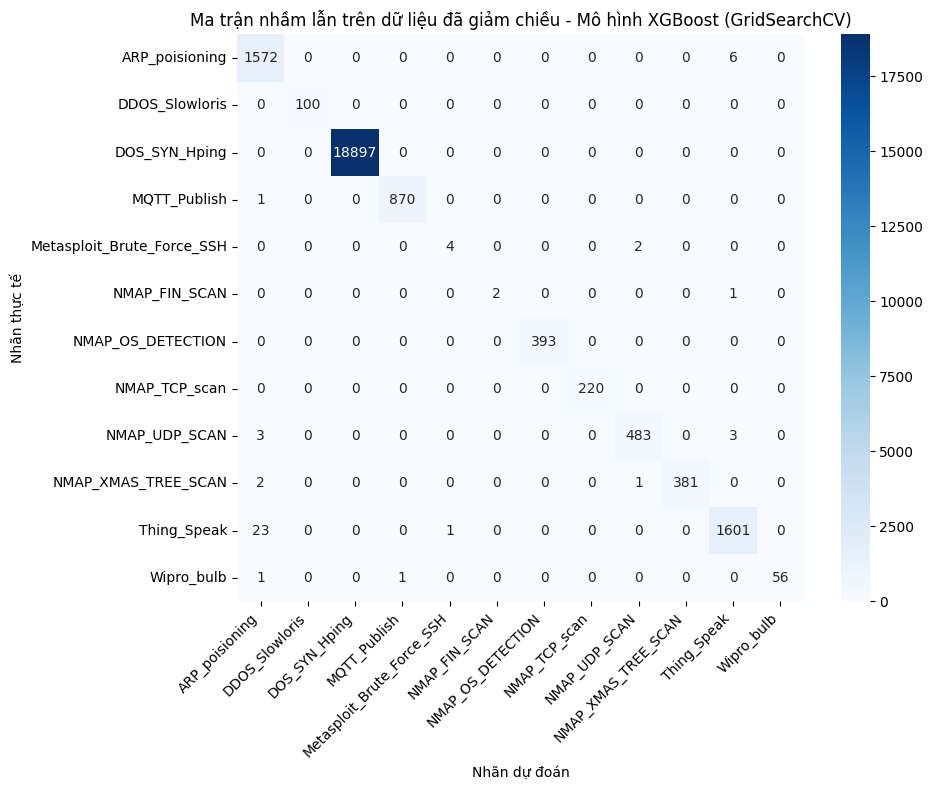

In [50]:
# Kiểm tra phân bố lớp
print("Class distribution:", Counter(y_train_sm_dr))

# Tính scale_pos_weight
class_counts = np.bincount(y_train_sm_dr)
scale_pos_weight = float(class_counts[0]) / class_counts[1]

# Không gian tham số
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'scale_pos_weight': [1.0, scale_pos_weight],
    'gamma': [0, 0.1, 0.2]
}

# Khởi tạo mô hình
xgb_model = model.get_xgboost_model(random_state=42)

# Tìm kiếm tham số với GridSearchCV
grid_search_xgb = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    cv=5,
    scoring='f1_macro',
    n_jobs=-1,
    verbose=1
)

# Huấn luyện
start_time = time.time()
grid_search_xgb.fit(X_train_sm_dr, y_train_sm_dr)
end_time = time.time()
print(f'Thời gian huấn luyện: {end_time - start_time:.2f} giây')

# Mô hình tốt nhất
best_xgb_model = grid_search_xgb.best_estimator_
print("Best parameters for XGBoost:", grid_search_xgb.best_params_)

# Đánh giá
y_pred_xgb = best_xgb_model.predict(X_test_sm_dr)
print("XGBoost Classification Report:")
utils.report(y_test_sm_dr, y_pred_xgb)
utils.plot_confusion_matrix(
    y_test_sm_dr,
    y_pred_xgb,
    attack_labels,
    "Ma trận nhầm lẫn trên dữ liệu đã giảm chiều - Mô hình XGBoost (GridSearchCV)"
)

In [51]:
accuracy = accuracy_score(y_test_sm_dr, y_pred_xgb)
print("Accuracy:", accuracy)

report = classification_report(y_test_sm_dr, y_pred_xgb, output_dict=True)
print("Precision (macro):", report["macro avg"]["precision"])
print("Recall (macro):", report["macro avg"]["recall"])
print("F1-score (macro):", report["macro avg"]["f1-score"])
print("Support (macro):", report["macro avg"]["support"])

Accuracy: 0.998172514619883
Precision (macro): 0.9806454282053942
Recall (macro): 0.938254043191547
F1-score (macro): 0.9561334059088332
Support (macro): 24624.0


KNN

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Thời gian huấn luyện: 155.43 giây
Best parameters for KNN: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}
KNN Classification Report:
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.98      1578
           1       0.99      1.00      1.00       100
           2       1.00      1.00      1.00     18897
           3       1.00      1.00      1.00       871
           4       0.50      0.83      0.62         6
           5       0.50      0.67      0.57         3
           6       1.00      1.00      1.00       393
           7       0.99      0.99      0.99       220
           8       0.99      0.98      0.99       489
           9       1.00      0.99      1.00       384
          10       0.99      0.98      0.99      1625
          11       0.96      0.88      0.92        58

    accuracy                           1.00     24624
   ma

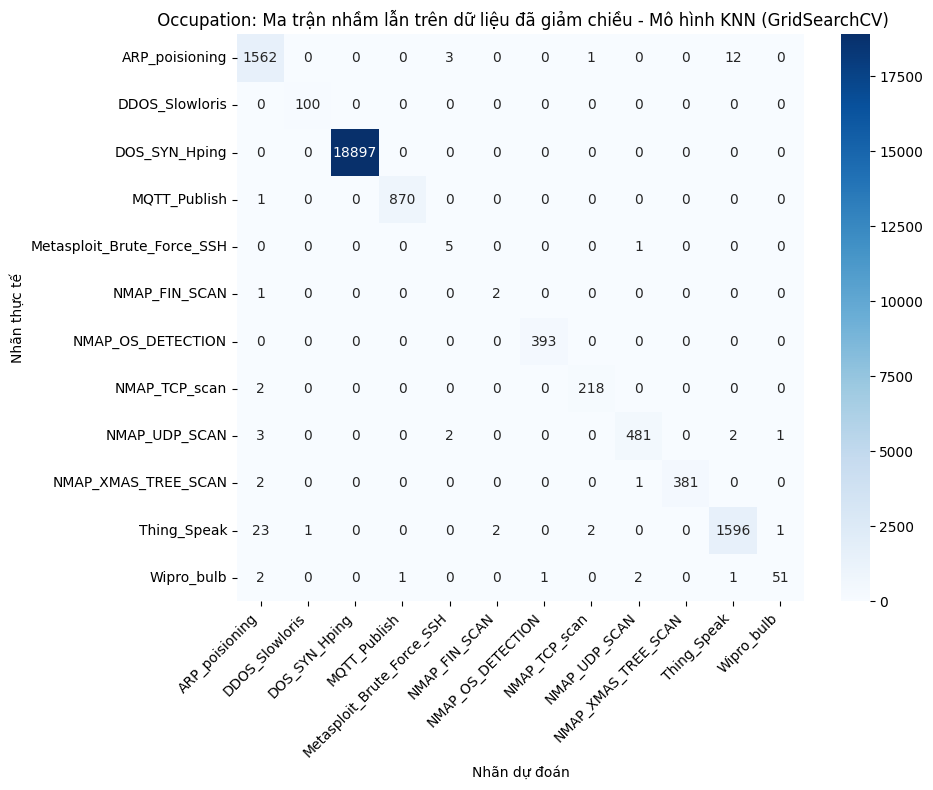

In [53]:
# Định nghĩa không gian tham số cho KNN
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# Khởi tạo mô hình
knn_model = model.get_knn_model()

# Tìm kiếm tham số với GridSearchCV
grid_search_knn = GridSearchCV(
    estimator=knn_model,
    param_grid=param_grid_knn,
    cv=5,
    scoring='f1_macro',
    n_jobs=-1,
    verbose=1
)

# Huấn luyện
start_time = time.time()
grid_search_knn.fit(X_train_sm_dr, y_train_sm_dr)
end_time = time.time()
print(f'Thời gian huấn luyện: {end_time - start_time:.2f} giây')

# Lấy mô hình tốt nhất
best_knn_model = grid_search_knn.best_estimator_
print("Best parameters for KNN:", grid_search_knn.best_params_)

# Dự đoán và đánh giá
y_pred_knn = best_knn_model.predict(X_test_sm_dr)
print("KNN Classification Report:")
utils.report(y_test_sm_dr, y_pred_knn)
utils.plot_confusion_matrix(
    y_test_sm_dr,
    y_pred_knn,
    attack_labels,
    " Occupation: Ma trận nhầm lẫn trên dữ liệu đã giảm chiều - Mô hình KNN (GridSearchCV)"
)

In [ ]:
accuracy = accuracy_score(y_test_sm_dr, y_pred_knn)
print("Accuracy:", accuracy)

report = classification_report(y_test_sm_dr, y_pred_knn, output_dict=True)
print("Precision (macro):", report["macro avg"]["precision"])
print("Recall (macro):", report["macro avg"]["recall"])
print("F1-score (macro):", report["macro avg"]["f1-score"])
print("Support (macro):", report["macro avg"]["support"])
